# <center><u>Linear Regression</u></center>

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. 

- Feature 1 
- Target 1
- Graph (Constantly Inc And Dec)

 ![](_img/img-Regression/Sr1.png)
**line(y)**
 ![](_img/img-Regression/lr.jpg)
**Coeficient or Slope(m)**
 ![](_img/img-Regression/lin_reg.PNG)
 
 **Intercept or Constant(b)**
 ![](img/img-Regression/find_b.PNG)
 
### **Where:** <p>                $\hat x: mean of x$ <br>              $\hat y:  mean of y$</p>

## **Program (Python)**


In [1]:
import pandas as pd
df=pd.read_csv('Dataset\Salary_Data.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [2]:
#feature
X=df.iloc[:,0:1].values   #2d
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [3]:
# target
Y=df.Salary.values    #1d
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [4]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()#initialize model
reg.fit(X,Y)#train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
import matplotlib.pyplot as plt
plt.plot(X,Y,c='r')
plt.scatter(X,Y,c='b')
plt.show()

<Figure size 640x480 with 1 Axes>

**Coeficient or Slope(m)**
 ![](lin_reg.PNG)

In [6]:
print(reg.coef_)

[9449.96232146]


In [7]:
x=X.flatten() #2d -> 1d
a=x*Y
import numpy as np
xm=np.mean(x)       # x mean
ym=np.mean(Y)       # y mean
xym=np.mean(a)      #(xy) mean
xsqrm=np.mean(x*x)  # x square mean
xmsqr=xm*xm         # x mean square

In [8]:
m=((xm*ym)-xym)/(xmsqr-xsqrm)
m

9449.962321455081

**Intercept or Constant(b)**
 ![](img/img-Regression/find_b.PNG)

In [9]:
print(reg.intercept_)

25792.20019866871


In [10]:
b=ym-m*xm
b

25792.200198668666

**Prediction**

In [11]:
print(reg.predict([[5]]))

[73042.01180594]


In [12]:
def predic(x):
    y=m*x +b
    return y
predic(5)

73042.01180594407

## Score Check

**Total_Data_r2_score**

In [13]:
from sklearn.metrics import r2_score
pred=reg.predict(X) 
r2_score(Y,pred)

0.9569566641435086

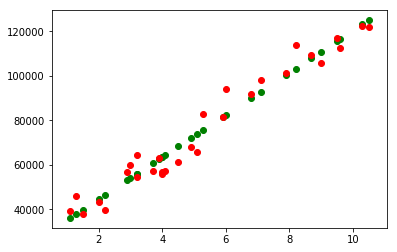

In [14]:
pred_X=reg.predict(X) 
#plt.plot(X,Y, 'r', x,pred_X, 'b--')
plt.scatter(X,pred_X,c='g')
plt.scatter(X,Y,c='r')

### Selection Data for Test Train 

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=5,random_state=10)

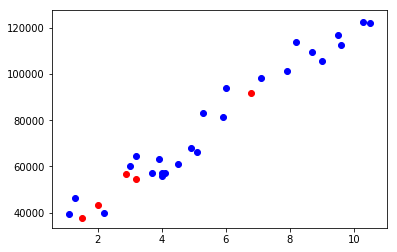

In [16]:
plt.scatter(X_test,Y_test,c='r')
plt.scatter(X_train,Y_train,c='b')
#plt.plot(X_train,pred_train,c='g')
plt.show()

**Train Data Set Enter in LinearRegression**

In [17]:
from sklearn.linear_model import LinearRegression
reg1=LinearRegression()#initialize model
reg1.fit(X_train,Y_train)#train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**pred_train_r2_score**

In [18]:
pred_train=reg.predict(X_train) # Train Data
from sklearn.metrics import r2_score
r2_score(Y_train,pred_train)

0.9486794446201121

**pred_test_r2_score**

In [19]:
pred_test=reg.predict(X_test) # Test Data
from sklearn.metrics import r2_score
r2_score(Y_test,pred_test)

0.9866419158934939

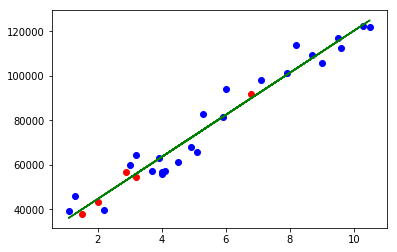

In [20]:
plt.scatter(X_test,Y_test,c='r')
plt.scatter(X_train,Y_train,c='b')
plt.plot(X_train,pred_train,c='g')
plt.show()